In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn
import pingouin as pg

In [2]:
df_ini = pd.read_csv('beta_US_noUS.csv', delimiter=';')
df_ini.head()

,subject,DM_mean_beta0003_US_sm6,DM_mean_beta0004_noUS_sm6,VL_mean_beta0003_US_sm6,VL_mean_beta0004_noUS_sm6
0,Alamal,1.097686,-0.641186,-0.124789,-1.046594
1,Assyxo,-0.759444,0.184164,-0.747364,0.958829
2,Azcnxv,-1.183852,0.290723,-1.814619,-0.168417
3,Bcwtzp,-0.960178,0.734662,0.048880,0.356640
4,Bqhldk,0.078748,-1.602244,-0.515071,0.173394


In [4]:
df = pd.melt(df_ini, id_vars= 'subject', value_vars=['DM_mean_beta0003_US_sm6', 'DM_mean_beta0004_noUS_sm6', 'VL_mean_beta0003_US_sm6', 'VL_mean_beta0004_noUS_sm6'])
df.head()

,subject,variable,value
0,Alamal,DM_mean_beta0003_US_sm6,1.097686
1,Assyxo,DM_mean_beta0003_US_sm6,-0.759444
2,Azcnxv,DM_mean_beta0003_US_sm6,-1.183852
3,Bcwtzp,DM_mean_beta0003_US_sm6,-0.960178
4,Bqhldk,DM_mean_beta0003_US_sm6,0.078748


In [5]:
def division_from_row(row):
    return row['variable'].split('_')[0]

def stimulus_from_row(row):
    return row['variable'].split('_')[-2]
    
df['division'] = df.apply(division_from_row, axis=1)
df['stimulus'] = df.apply(stimulus_from_row, axis=1)

df['division'] = df['division'].str.replace('DM','centromedial')
df['division'] = df['division'].str.replace('VL','basolateral')

df.head()

,subject,variable,value,division,stimulus
0,Alamal,DM_mean_beta0003_US_sm6,1.097686,centromedial,US
1,Assyxo,DM_mean_beta0003_US_sm6,-0.759444,centromedial,US
2,Azcnxv,DM_mean_beta0003_US_sm6,-1.183852,centromedial,US
3,Bcwtzp,DM_mean_beta0003_US_sm6,-0.960178,centromedial,US
4,Bqhldk,DM_mean_beta0003_US_sm6,0.078748,centromedial,US


In [6]:
sem = df.groupby(["variable"])["value"].sem()
print(sem)

variable
DM_mean_beta0003_US_sm6      0.229352
DM_mean_beta0004_noUS_sm6    0.184991
VL_mean_beta0003_US_sm6      0.177935
VL_mean_beta0004_noUS_sm6    0.135738
Name: value, dtype: float64


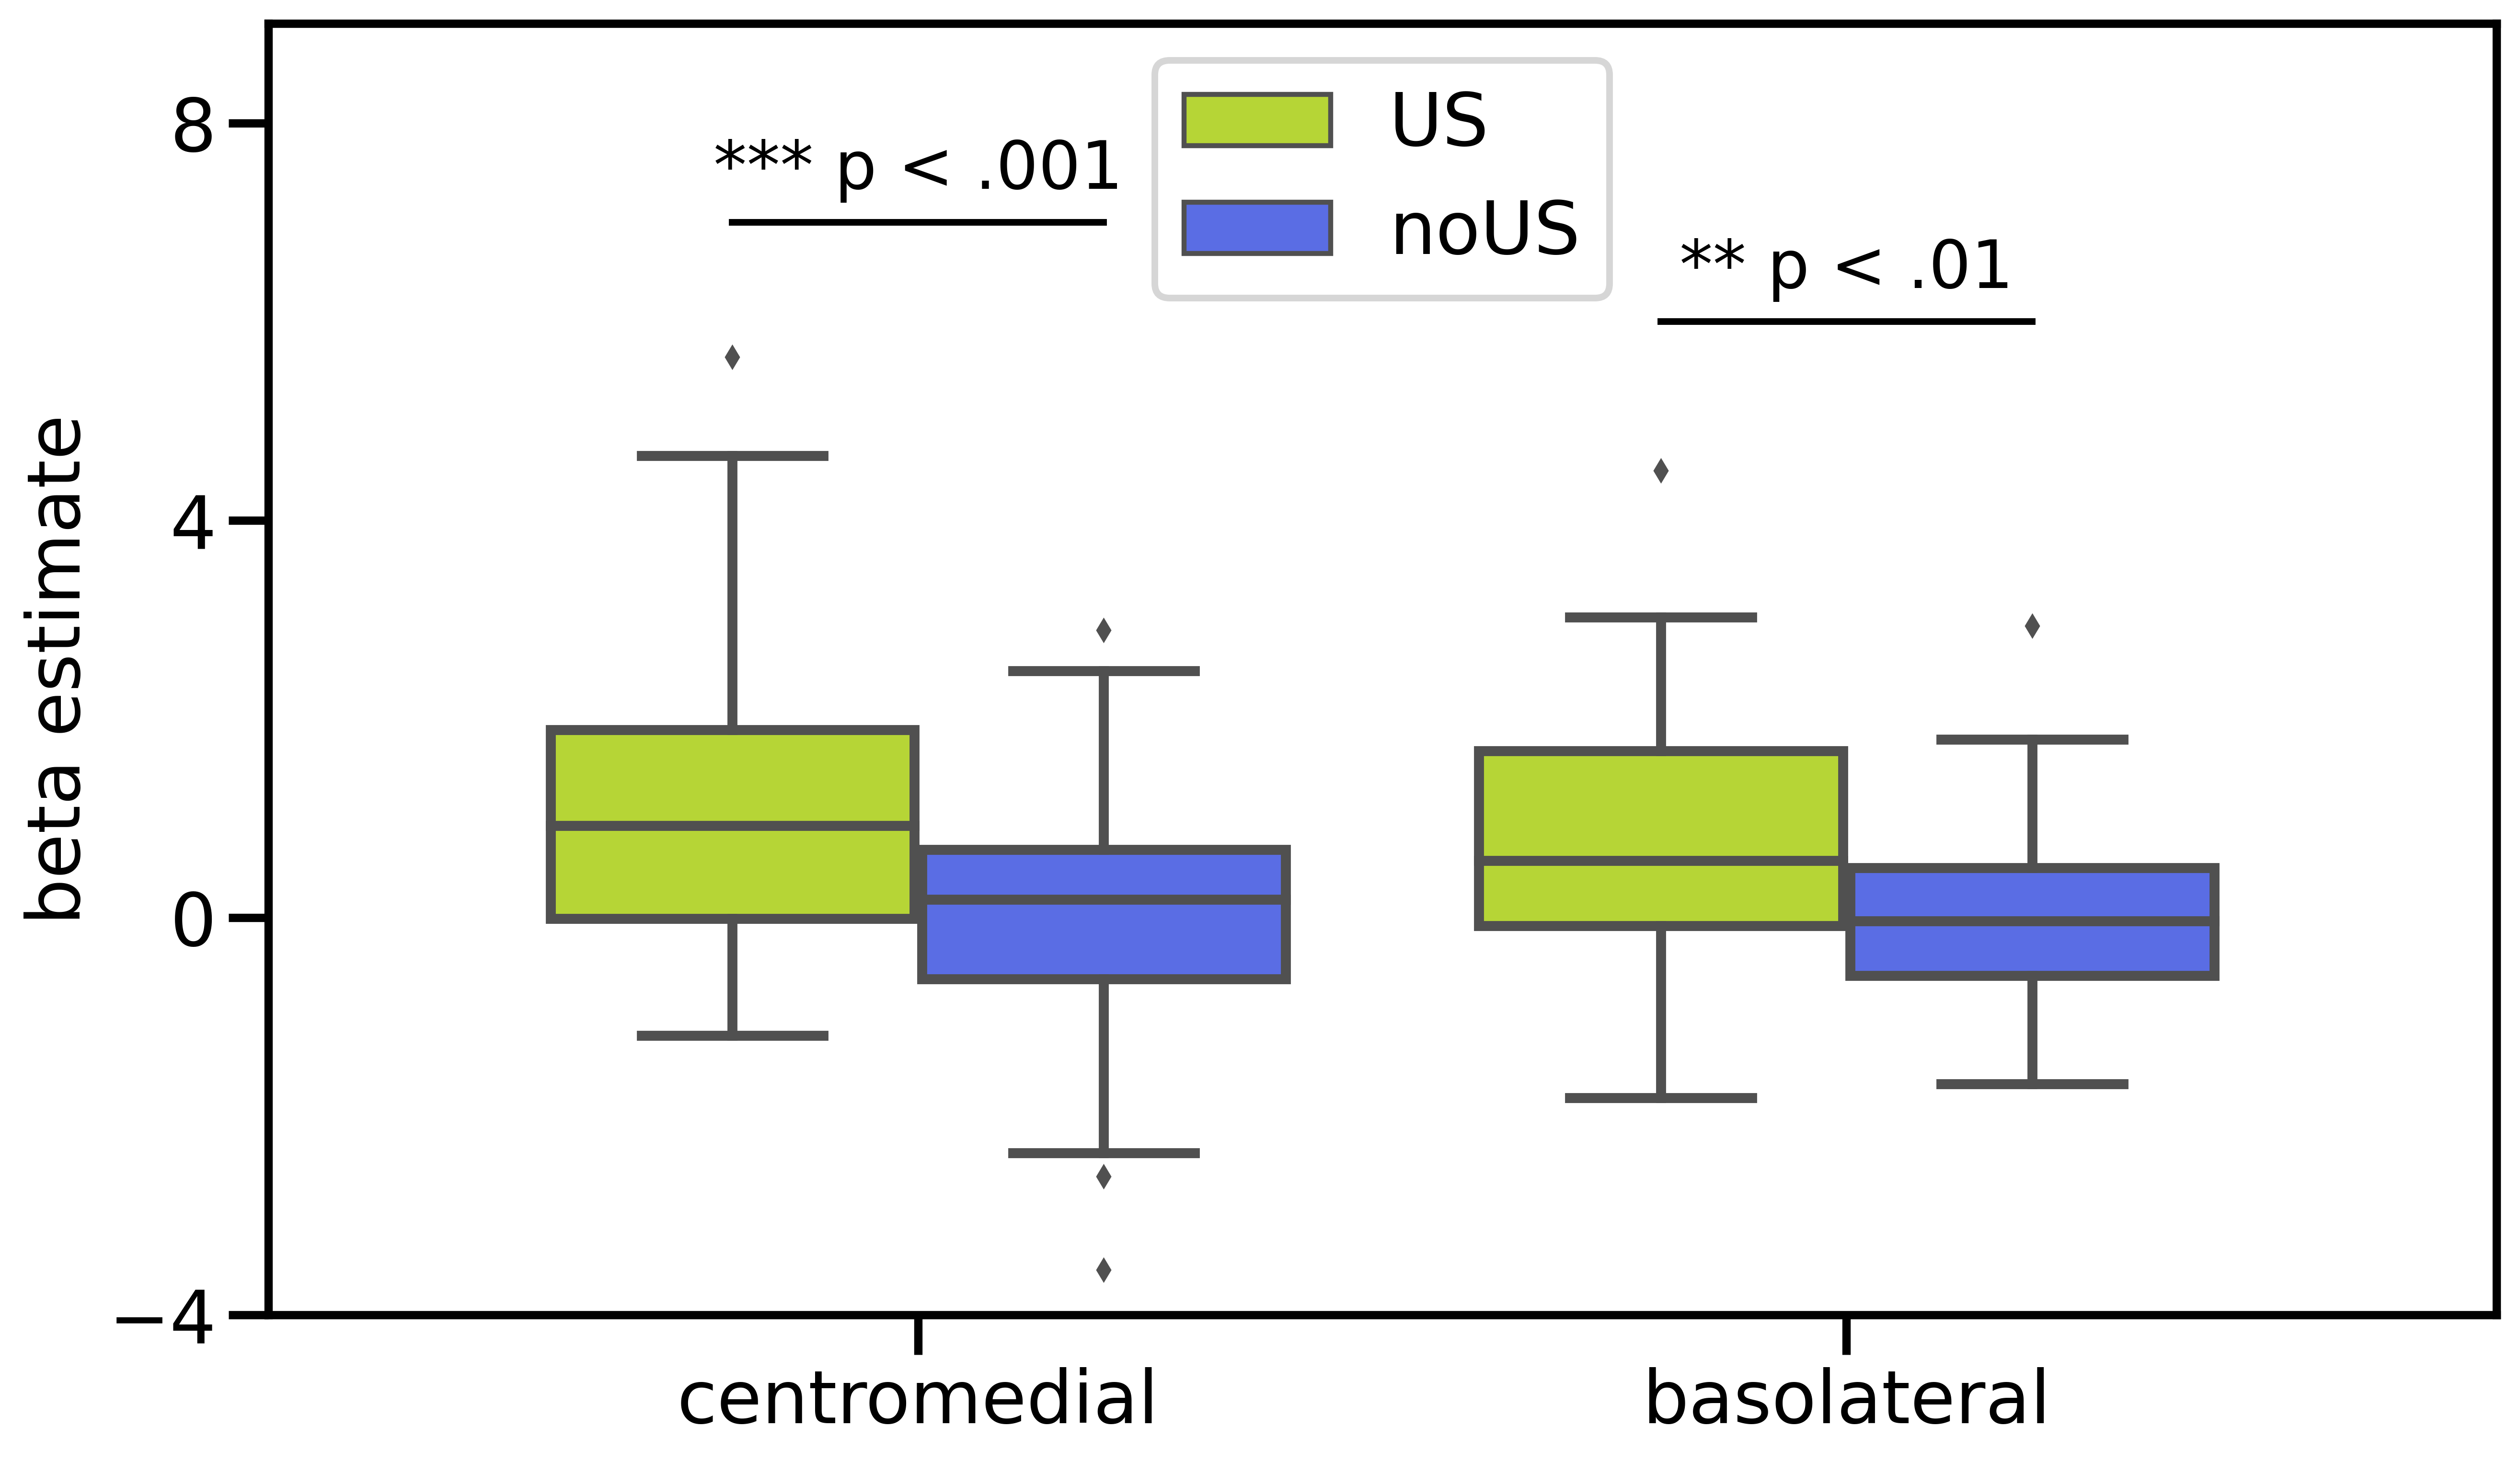

In [7]:
plt.figure(figsize=(12, 7), dpi=500)
seaborn.set_context('poster')
pal_1 = seaborn.color_palette(['#C7EF1B', '#435CFB'])

ax = seaborn.boxplot(x="division", y="value", hue="stimulus",
                     data=df, palette=pal_1, fliersize = 4)   
#for patch in ax.artists:
#    fc = patch.get_facecolor()
#    patch.set_facecolor(mpl.colors.to_rgba(fc, 0.75))

plt.xlabel("")
plt.ylabel("beta estimate", fontsize=22)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)

plt.legend(loc = 'upper center')
plt.ylim(-4,9)
plt.yticks([-4, 0, 4, 8])

plt.plot([-0.2,-0.2,0.2,0.2], [7,7,7,7], linewidth=2, color='k') # 0 i 1 to pierwsze dwa elementy na osi x; 80 to wartość osi y
plt.text((-0.2+0.2)*.5, 7+0.2, "*** p < .001", ha='center', va='bottom', color='k', fontsize=20)
plt.plot([0.8,0.8,1.2,1.2], [6, 6, 6, 6], linewidth=2, color='k') # 0 i 1 to pierwsze dwa elementy na osi x; 80 to wartość osi y
plt.text((0.8+1.2)*.5, 6+0.2, "** p < .01", ha='center', va='bottom', color='k', fontsize=20)

plt.savefig('wykresy/beta_estimates_boxplot.tiff')
plt.show()

/var/folders/_x/ry9s55s15p7fz95r041pw6fc0000gp/T/ipykernel_6307/1162296408.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = seaborn.barplot(x="division", y="value", hue="stimulus",


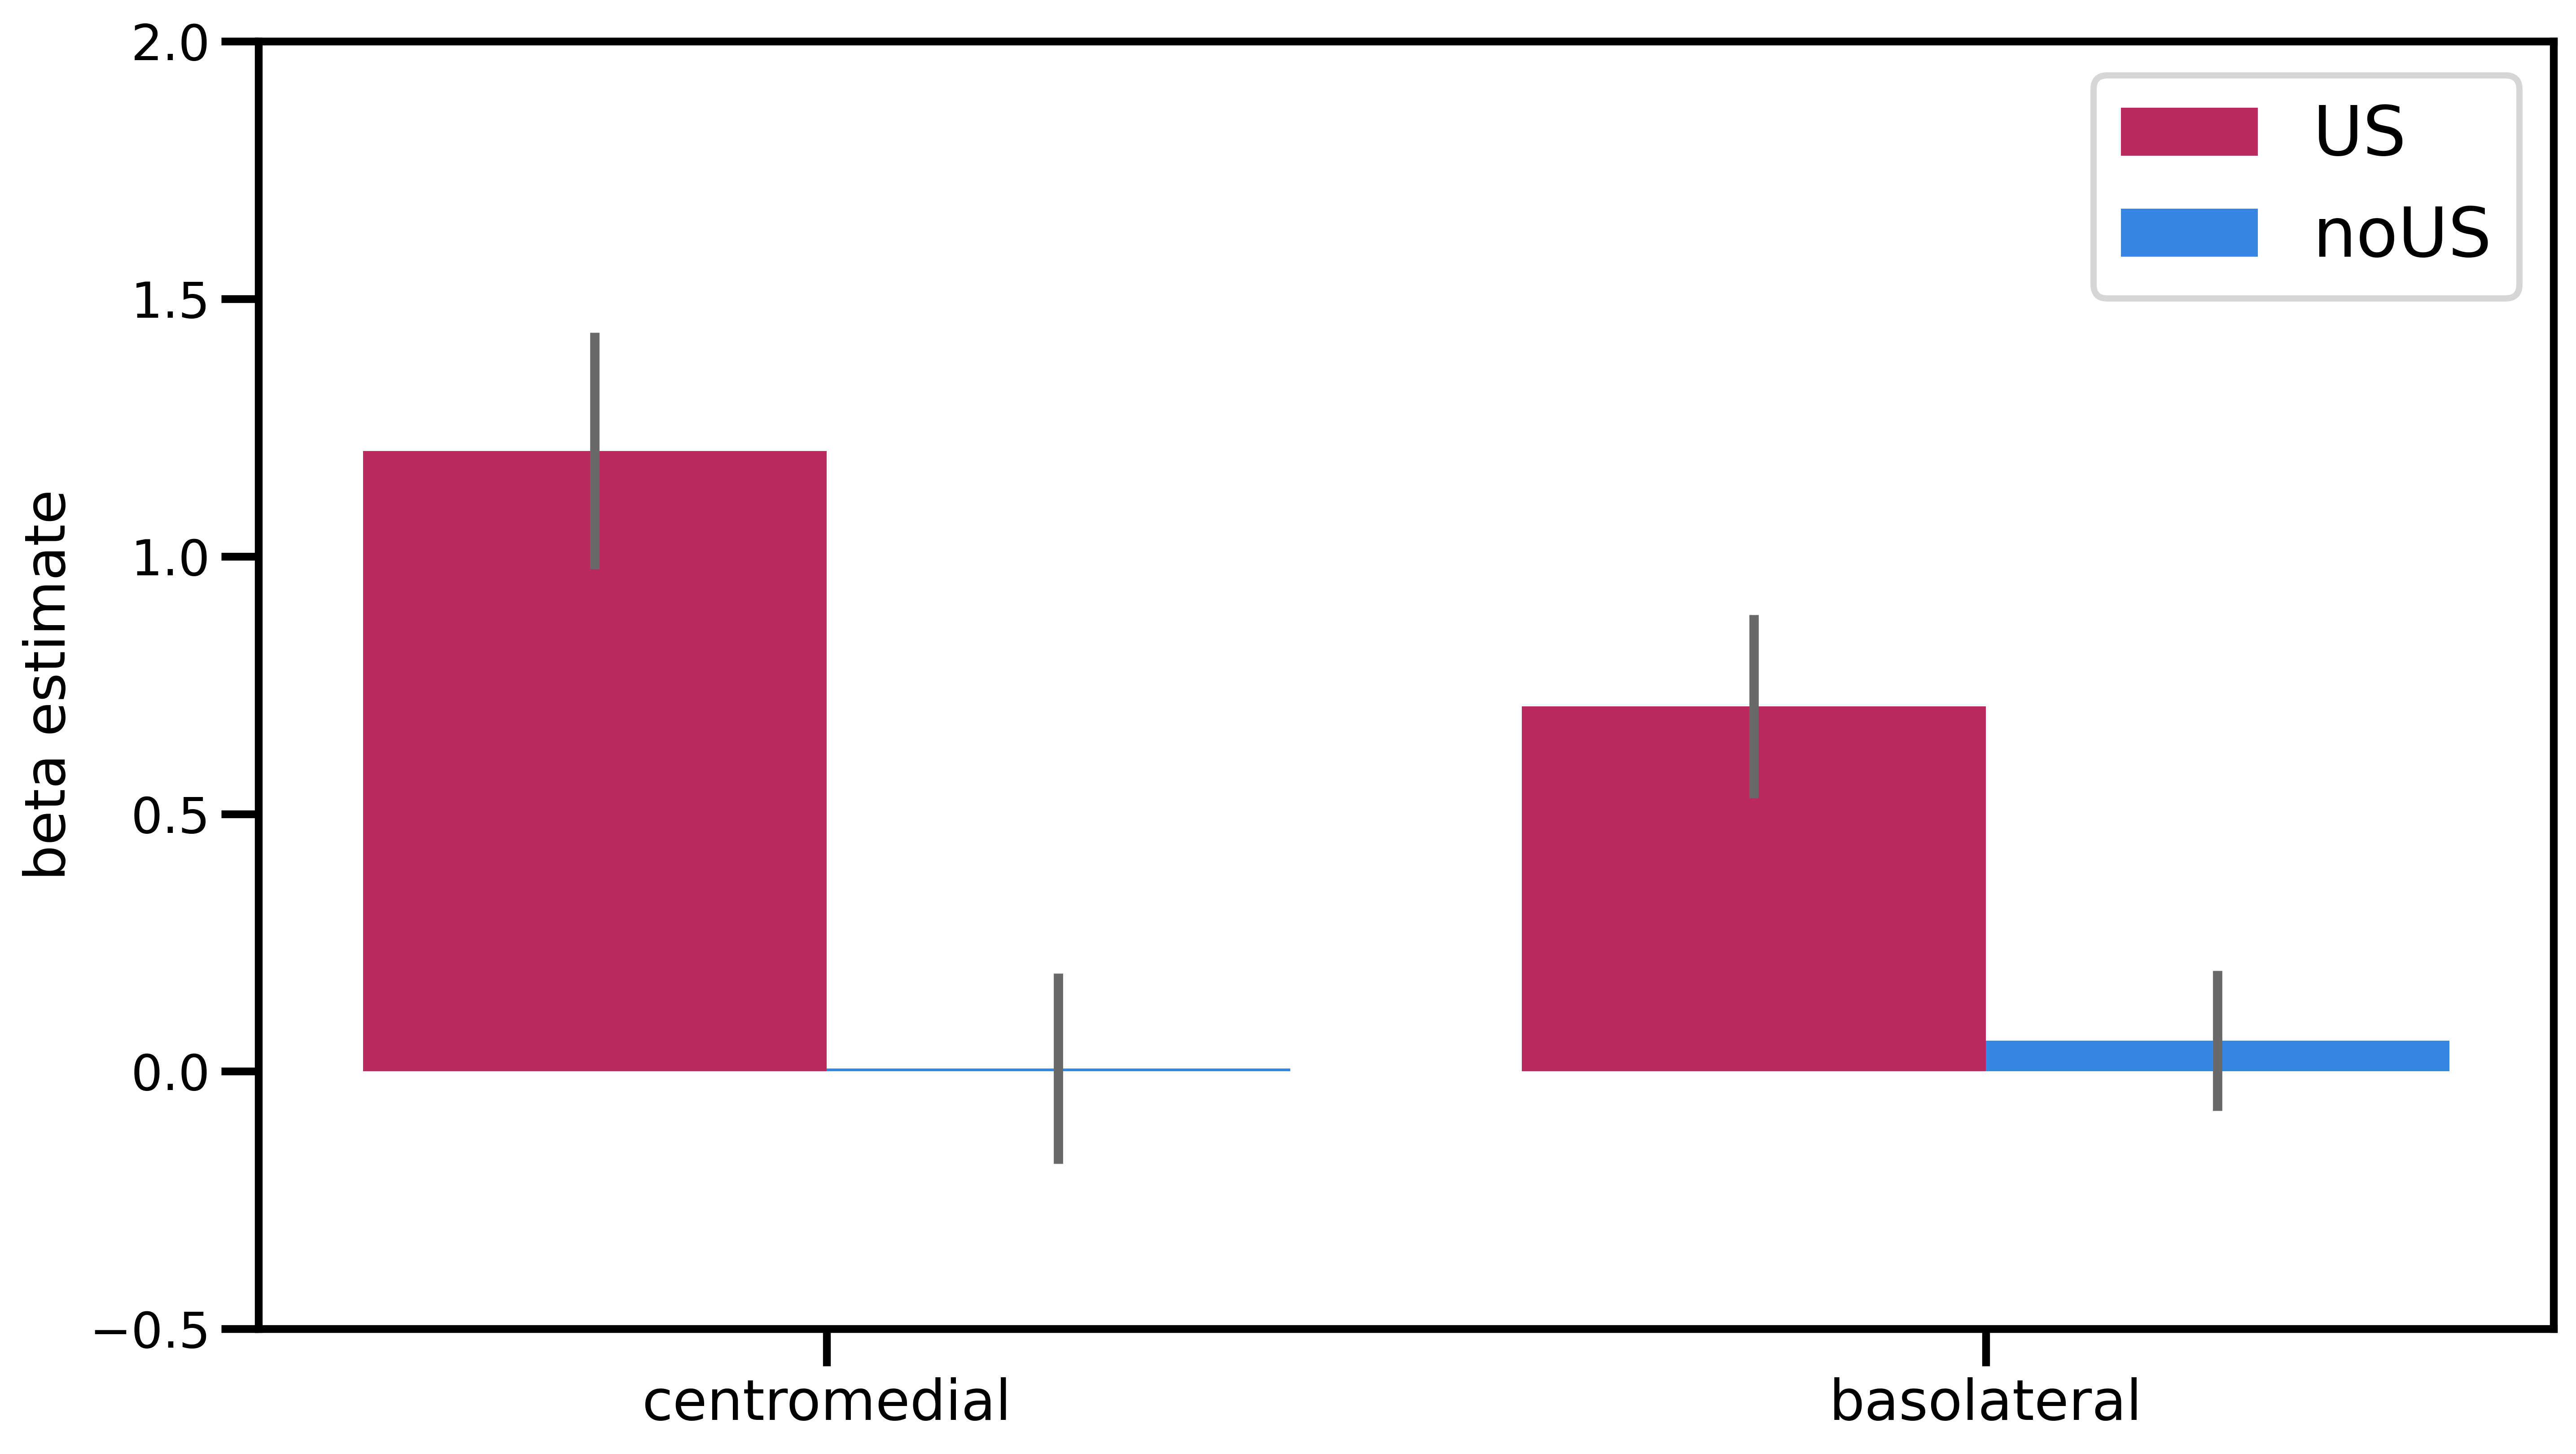

In [8]:
plt.figure(figsize=(12, 7), dpi=500)
seaborn.set_context('poster')
pal_1 = seaborn.color_palette(["#D41159", "#1A85FF"])

ax = seaborn.barplot(x="division", y="value", hue="stimulus",
                     data=df, palette=pal_1, ci=None, errwidth=1)   

# get x & height for each container going from left to right
n_containers = len(ax.containers)
n_bars = len(ax.containers[0])
x = []
h = []
for i in range(n_bars):
    for j in range(n_containers):
        x.append(ax.containers[j][i].get_x() + ax.containers[j][i].get_width()/2)
        h.append(ax.containers[j][i].get_height())

ax.errorbar(x, h, sem.values, fmt=' ', ecolor='dimgrey')

plt.xlabel("")
plt.ylabel("beta estimate", fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=16)

plt.legend()
plt.ylim(-0.5, 2)
plt.tight_layout()

plt.savefig('wykresy/beta_estimates_barplot.tiff')
plt.show()

In [9]:
scipy.stats.ttest_rel(df_ini.DM_mean_beta0003_US_sm6, df_ini.DM_mean_beta0004_noUS_sm6)

Ttest_relResult(statistic=4.242070760916898, pvalue=0.00010592779588673808)

In [10]:
scipy.stats.ttest_rel(df_ini.VL_mean_beta0003_US_sm6, df_ini.VL_mean_beta0004_noUS_sm6)

Ttest_relResult(statistic=2.7905435756740387, pvalue=0.007634255782401964)